<a href="https://colab.research.google.com/github/yash171102/Credit-Risk-Evaluation/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files


uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('credit_risk_dataset.csv')
print(df.head(5))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
print(df)

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [ ]:
# Remove rows with missing values
df = df.dropna()

In [ ]:
print(df)

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [ ]:
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
# Rename 'loan_status' column to 'default'
df = df.rename(columns={'loan_status': 'default'})



In [ ]:
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  default  \
0    PERSONAL          D      35000          16.02        1   
1   EDUCATION          B       1000          11.14        0   
2     MEDICAL          C       5500          12.87        1   
3     MEDICAL          C      35000          15.23        1   
4     MEDICAL          C      35000          14.27        1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10  

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])

In [ ]:
# Separate predictors and target variable
x = numeric_data.drop(columns=["default"])
y = df["default"]

In [ ]:
# Calculate Z-scores for each numeric variable
z_scores = (x - x.mean()) / x.std()

In [ ]:
# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)

In [ ]:
df = df[~outliers.any(axis=1)]
print(df)

       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
5              21           9900                   OWN                2.0   
9              21          10000                   OWN                6.0   
11             21          10000                   OWN                2.0   
19             24          10800              MORTGAGE                8.0   
...           ...            ...                   ...                ...   
32290          37          90000              MORTGAGE               11.0   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  default  \
1

In [ ]:
# Calculate percentage of non-default and default cases
non_default_percentage = (df['default'] == 0).mean() * 100
default_percentage = (df['default'] == 1).mean() * 100

In [ ]:
print('Non Default:', round(non_default_percentage, 2), '% of the dataset')
print('Default:', round(default_percentage, 2), '% of the dataset')

Non Default: 79.04 % of the dataset
Default: 20.96 % of the dataset


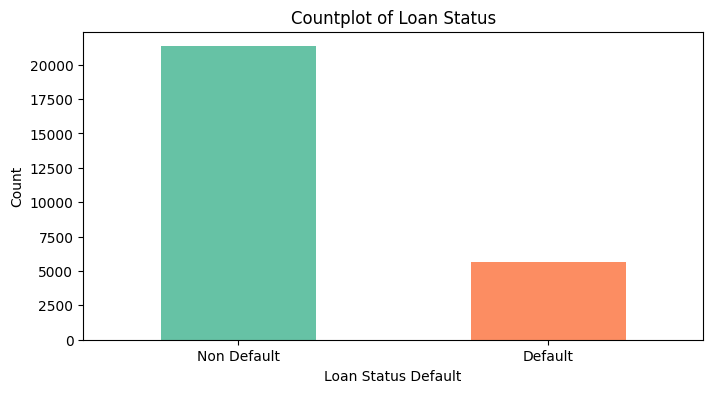

In [ ]:
# Plot countplot of loan status
plt.figure(figsize=(8, 4))
df['default'].value_counts().plot(kind='bar', color=['#66c2a5', '#fc8d62'])
plt.xlabel("Loan Status Default")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.xticks(ticks=[0, 1], labels=['Non Default', 'Default'], rotation=0)
plt.show()

In [ ]:
from matplotlib.gridspec import GridSpec

In [ ]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

In [ ]:
# Define the number of columns and rows for the subplots
num_cols = 3
num_rows = -(-len(numeric_cols) // num_cols)  # Ceiling division

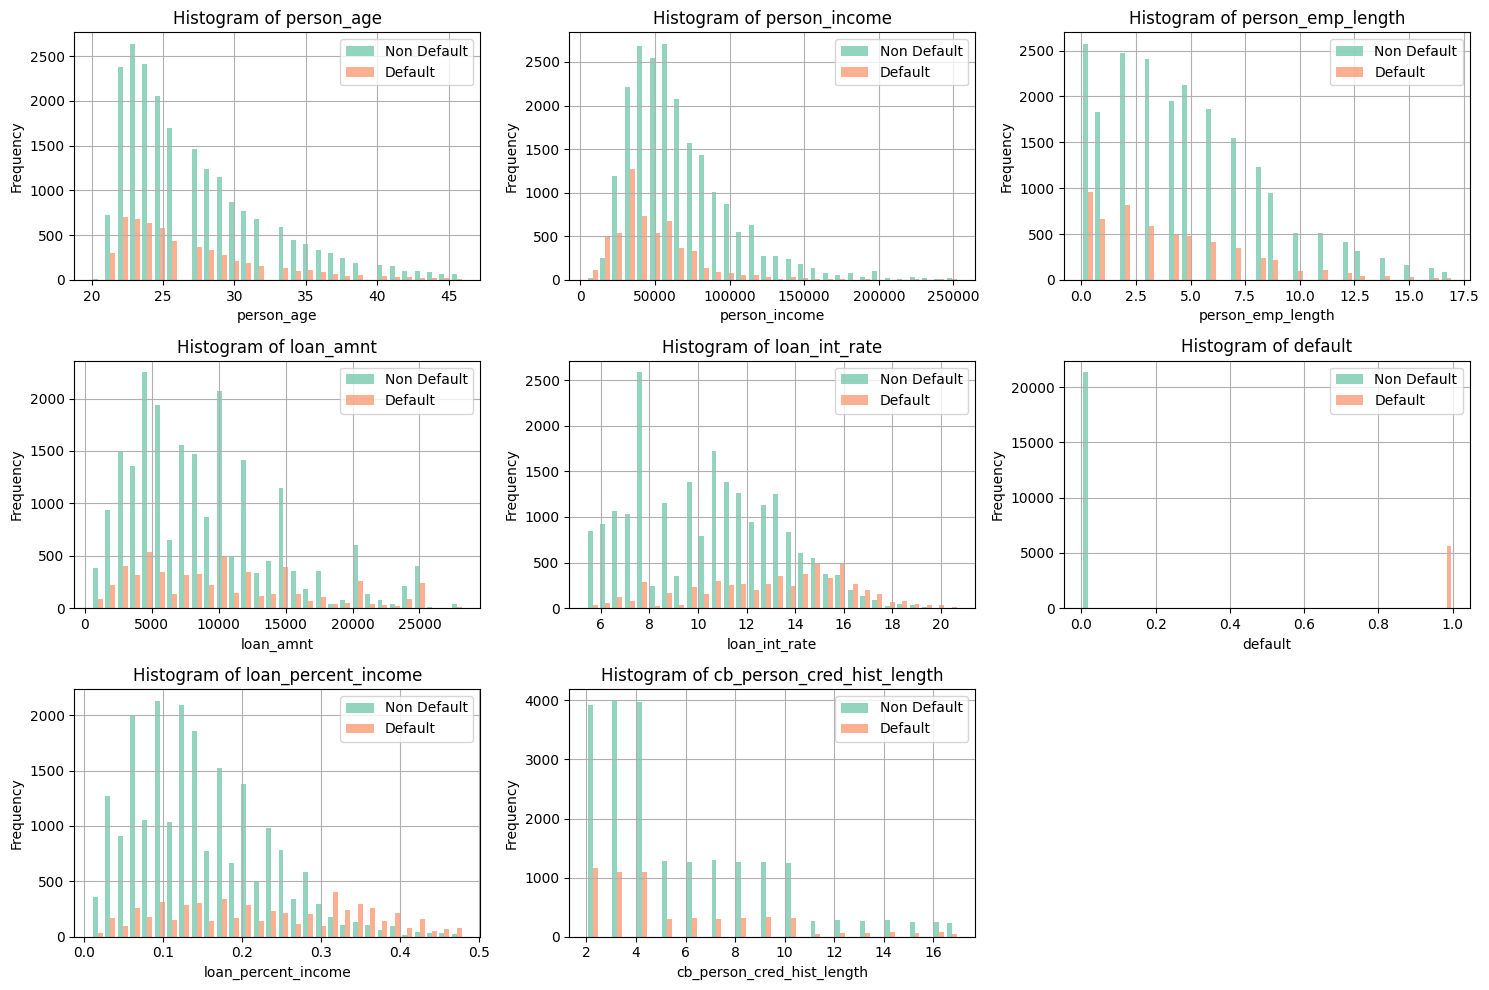

In [ ]:
# Create a function to plot histograms
def plot_histogram(data, x_var, default_var, num_bins=30):
    plt.hist([data[data[default_var] == 0][x_var], data[data[default_var] == 1][x_var]],
             bins=num_bins, alpha=0.7, label=['Non Default', 'Default'], color=['#66c2a5', '#fc8d62'])
    plt.title(f"Histogram of {x_var}")
    plt.xlabel(x_var)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

# Create the subplots
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(num_rows, num_cols, figure=fig)

for i, col in enumerate(numeric_cols):
    ax = fig.add_subplot(gs[i])
    plot_histogram(df, col, "default")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separate predictors and target variable
x = df.drop(columns=["default"])
y = df["default"]

In [ ]:
# Encode categorical variables without intercept
x_encoded = pd.get_dummies(x, drop_first=True)

# Combine encoded features with the target variable
df_encoded = pd.concat([x_encoded, y], axis=1)


In [ ]:
# Set random seed
np.random.seed(123)

In [ ]:
# Create training and testing sets based on the stratified sample
train_data, test_data = train_test_split(df_encoded, test_size=0.5, stratify=df_encoded['default'])


In [ ]:
# Display the percentage of non-default and default cases in the testing set
non_default_percentage = (test_data['default'] == 0).mean() * 100
default_percentage = (test_data['default'] == 1).mean() * 100

In [ ]:
print('Non Default:', round(non_default_percentage, 2), '% of the dataset')
print('Default:', round(default_percentage, 2), '% of the dataset')

Non Default: 79.04 % of the dataset
Default: 20.96 % of the dataset


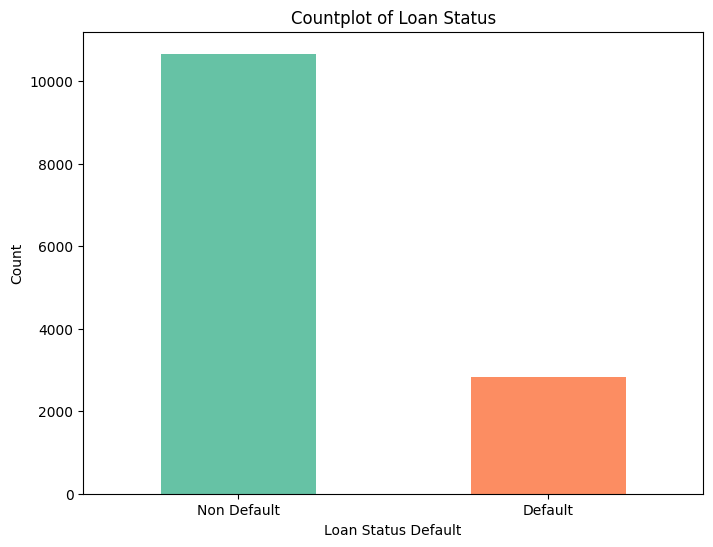

       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
5650           23          95004                2.0       5000           9.63   
25169          28          80004                5.0      12000           6.91   
4121           23          40000                7.0       5000           8.49   
6038           26          52500                0.0       5700          11.12   
7366           25          75000                2.0       6500          13.57   

       loan_percent_income  cb_person_cred_hist_length  \
5650                  0.05                           4   
25169                 0.15                           6   
4121                  0.13                           4   
6038                  0.11                           2   
7366                  0.09                           2   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
5650                         False                      False   
25169                        False

In [ ]:
plt.figure(figsize=(8, 6))
test_data['default'].value_counts().plot(kind='bar', color=['#66c2a5', '#fc8d62'])
plt.xlabel("Loan Status Default")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.xticks(ticks=[0, 1], labels=['Non Default', 'Default'], rotation=0)
plt.show()

# Display the first few rows of the sampled data
print(test_data.head())

In [ ]:
import seaborn as sns

In [ ]:

# Calculate correlation excluding the target variable
correlation = train_data.corr().loc[:, 'default'].drop('default')

In [ ]:
# Sort correlation values
correlation = correlation.sort_values(ascending=False)

In [ ]:
# Extract column names
col_names = correlation.index.tolist()

In [ ]:
# Create a color palette
colors = sns.color_palette("plasma", len(correlation))

<ipython-input-36-89d7c29e8a01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=col_names, palette=colors)


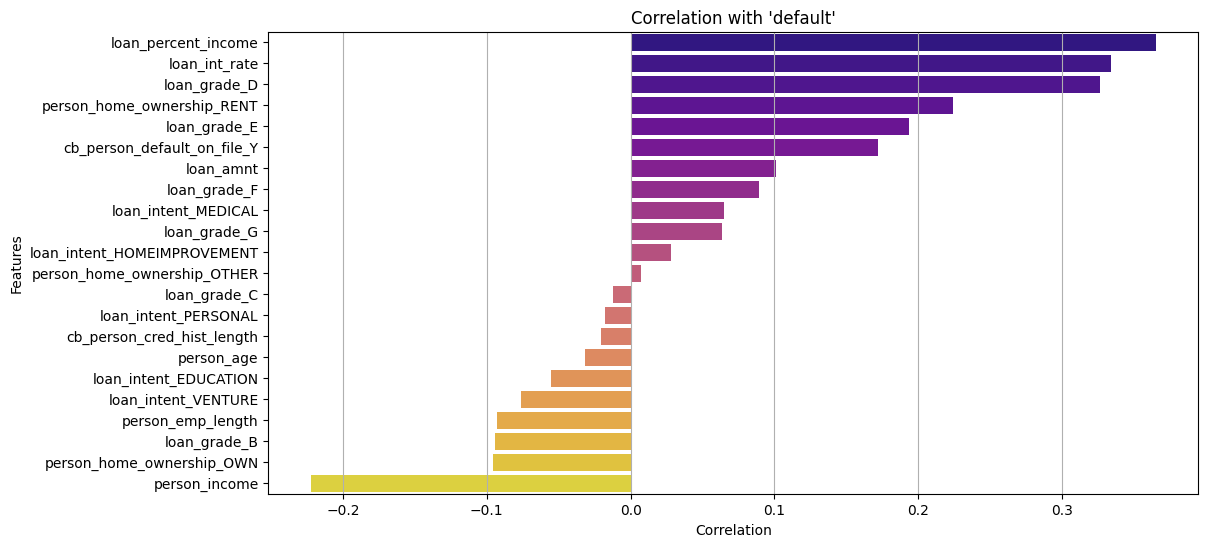

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.values, y=col_names, palette=colors)
plt.title("Correlation with 'default'")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.grid(axis='x')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26993 entries, 1 to 32296
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26993 non-null  int64  
 1   person_income               26993 non-null  int64  
 2   person_home_ownership       26993 non-null  object 
 3   person_emp_length           26993 non-null  float64
 4   loan_intent                 26993 non-null  object 
 5   loan_grade                  26993 non-null  object 
 6   loan_amnt                   26993 non-null  int64  
 7   loan_int_rate               26993 non-null  float64
 8   default                     26993 non-null  int64  
 9   loan_percent_income         26993 non-null  float64
 10  cb_person_default_on_file   26993 non-null  object 
 11  cb_person_cred_hist_length  26993 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.7+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
person_home_ownership=enc.fit_transform(df['person_home_ownership'])

In [ ]:
loan_intent=enc.fit_transform(df['loan_intent'])

In [ ]:
loan_grade=enc.fit_transform(df['loan_grade'])

In [ ]:
cb_person_default_on_file=enc.fit_transform(df['cb_person_default_on_file'])

In [ ]:
df['person_home_ownership']=person_home_ownership

In [ ]:
df['loan_intent']=loan_intent

In [ ]:
df['loan_grade']=loan_grade

In [ ]:
df['cb_person_default_on_file']=cb_person_default_on_file

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26993 entries, 1 to 32296
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26993 non-null  int64  
 1   person_income               26993 non-null  int64  
 2   person_home_ownership       26993 non-null  int64  
 3   person_emp_length           26993 non-null  float64
 4   loan_intent                 26993 non-null  int64  
 5   loan_grade                  26993 non-null  int64  
 6   loan_amnt                   26993 non-null  int64  
 7   loan_int_rate               26993 non-null  float64
 8   default                     26993 non-null  int64  
 9   loan_percent_income         26993 non-null  float64
 10  cb_person_default_on_file   26993 non-null  int64  
 11  cb_person_cred_hist_length  26993 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.7 MB


In [ ]:
X=df.drop('default',axis=1)

In [ ]:
Y=df['default']

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test , Y_train , Y_test =train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [ ]:
Y_pred1=lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac_lr=accuracy_score(Y_test,Y_pred1)
ac_lr

0.8501574365623263

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.0373317 , 0.12540776, 0.13505983, 0.06363176, 0.10180867,
       0.17212393, 0.04549074, 0.06218877, 0.22344533, 0.00503024,
       0.02848126])

In [ ]:
Y_pred=dt.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_dt

0.8825708464530468

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state =0)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
predict_random_forest = random_forest.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(Y_test, predict_random_forest)

In [ ]:
accuracy

0.9259122059640674

In [ ]:
import statsmodels.api as sm

In [ ]:
result=lr.fit(X_train_std,Y_train)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming you have your data in X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Calculate AIC and BIC
aic = result.aic
bic = result.bic

print("AIC:", aic)
print("BIC:", bic)

Optimization terminated successfully.
         Current function value: 0.362414
         Iterations 7
AIC: 15675.948504807191
BIC: 15771.710554134876


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


In [ ]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred2=knn.predict(X_test_std)

In [ ]:
ac_knn=accuracy_score(Y_test,Y_pred2)
ac_knn

0.8742359696240044